# Fake news detection

## Data preperation

In [31]:
# import datasets
import pandas as pd

df_fake = pd.read_csv('/Users/gourisrinijag/Desktop/others/CM3070/CM-3070-Final-Project/Fake.csv')
df_true = pd.read_csv('/Users/gourisrinijag/Desktop/others/CM3070/CM-3070-Final-Project/True.csv')

df_fake['label'] = 'fake'
df_true['label'] = 'true'

df = pd.concat([df_fake, df_true]).reset_index(drop = True)
#df_fake
#df_true

In [32]:
#print combined dataset
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [36]:
#Ensure there are no null values
df.isnull().sum()

title       0
text        0
subject     0
date        0
label       0
all_text    0
dtype: int64

/Users/gourisrinijag/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

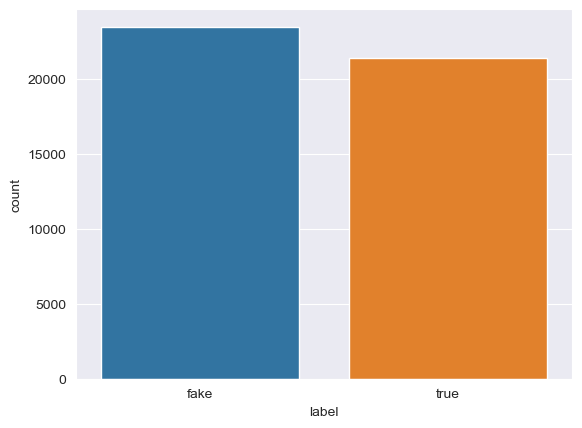

In [136]:
# number of fake and true articles in the dataset
import seaborn as sns

sns.set_style("darkgrid")
sns.countplot(df['label'])

/Users/gourisrinijag/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

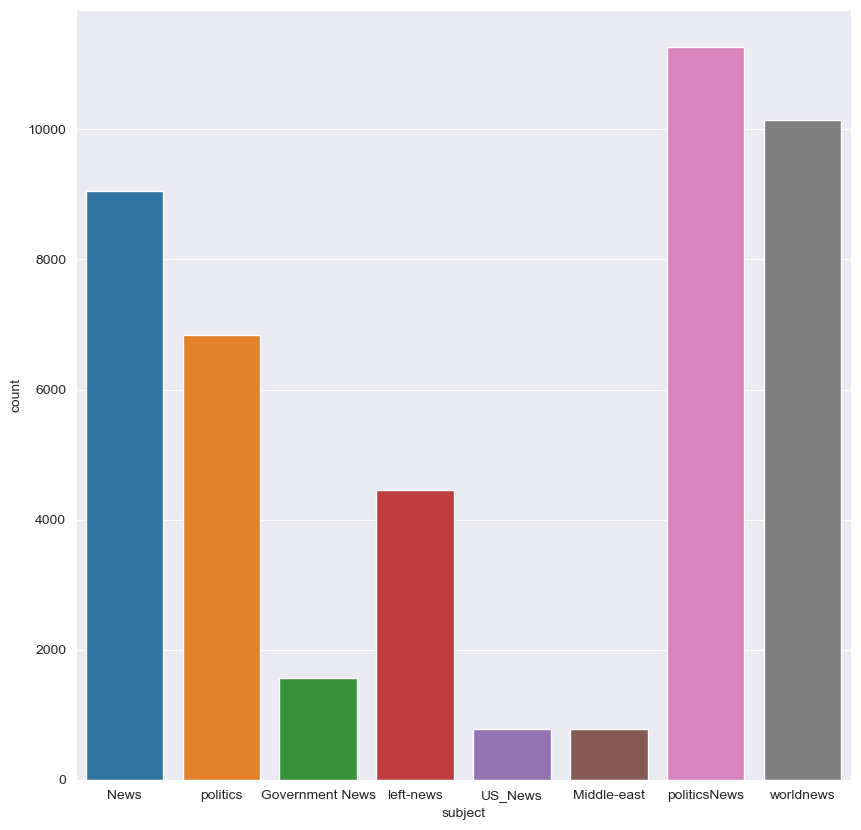

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(df['subject'])

In [34]:
# Combine the title and text in a seperate column

df['all_text'] = df['title'] + df['text']
#df['all_text'][0]

## Text Processing

In [38]:
#Lowercase 

df['all_text'] = df['all_text'].str.lower()
#df.head()

In [39]:
from nltk.tokenize import WordPunctTokenizer

In [40]:
#Tokenize

wp_tokenize = WordPunctTokenizer()

In [41]:
df['tokenized_text_column'] = df['all_text'].apply(wp_tokenize.tokenize)
#df.head()

In [42]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [43]:
#Lemmatize 

lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [44]:
#Remove stop words 

for i, tokenized_text in enumerate(df['tokenized_text_column']):
    lemmatized_text = [lm.lemmatize(word) for word in tokenized_text if word.lower() not in stop_words]
    df['tokenized_text_column'][i] = lemmatized_text
#df.head()
#df[['all_text', 'tokenized_text_column']].head()

In [45]:
#Rejoin the tokenized words 

for i, final_text in enumerate(df['tokenized_text_column']):
    df['tokenized_text_column'][i] = " ".join(final_text)
df[['all_text', 'tokenized_text_column']].head()

,all_text,tokenized_text_column
0,donald trump sends out embarrassing new year’...,donald trump sends embarrassing new year ’ eve...
1,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama’s name...,trump obsessed even obama ’ name coded website...
4,pope francis just called out donald trump dur...,pope francis called donald trump christmas spe...


## Build Classifier 

In [48]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['all_text'],df['label'],test_size=0.2, random_state = 1)

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import sklearn.metrics as metrics                                                 
from sklearn.metrics import confusion_matrix


### Baseline

accuracy:   99.477
F1 Score: 0.9945405970495993
Precision: 0.9930410577592206
Recall: 0.9960446719404374


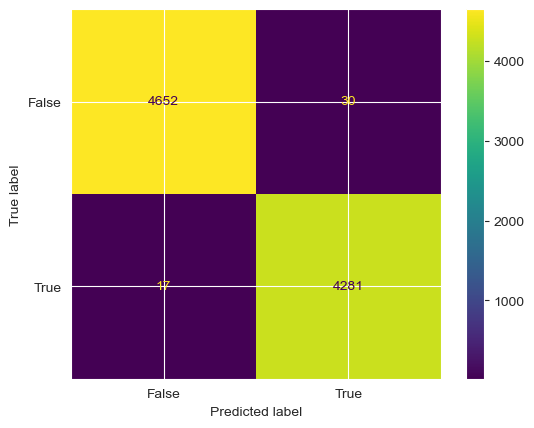

In [63]:
#Passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)

cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


/Users/gourisrinijag/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy:   88.040
F1 Score: 0.8797850906648758
Precision: 0.8477135461604832
Recall: 0.9143787808282923


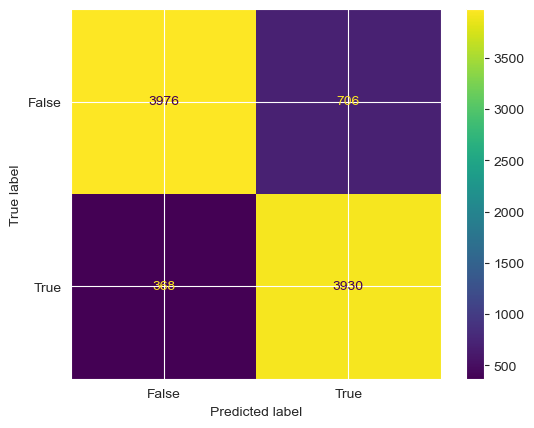

In [66]:
#K-Nearest Neighbours 

from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  KNeighborsClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)

cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


accuracy:   94.131
F1 Score: 0.9378464441561505
Precision: 0.9509686677828271
Recall: 0.9250814332247557


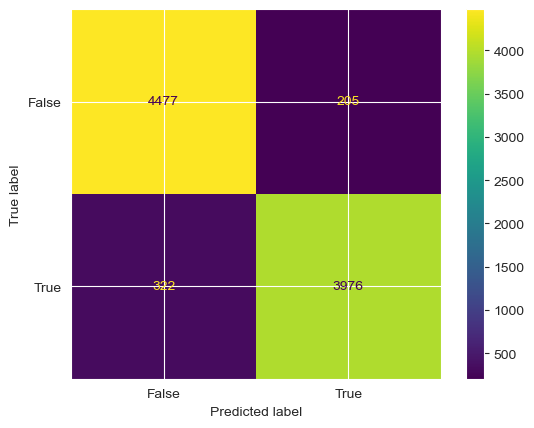

In [61]:
#Multinomial Naive Bayes 

from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)

f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)

cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

accuracy:   98.742
F1 Score: 0.9868833430063841
Precision: 0.9847116052814454
Recall: 0.9890646812470917


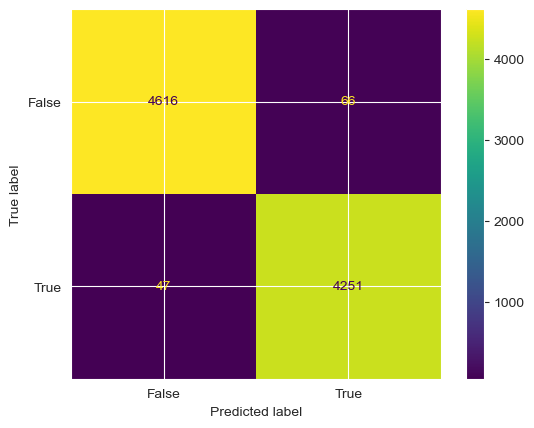

In [65]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  LogisticRegression())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)

cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


accuracy:   99.465
F1 Score: 0.9944237918215614
Precision: 0.9930394431554525
Recall: 0.9958120055839925


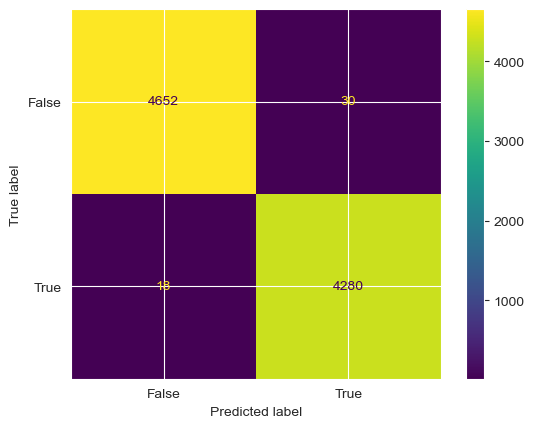

In [62]:
#Support Vector Machine

from sklearn.svm import LinearSVC

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)

f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)
    
cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

accuracy:   99.543
F1 Score: 0.9952386482406224
Precision: 0.9935079990725713
Recall: 0.9969753373662168


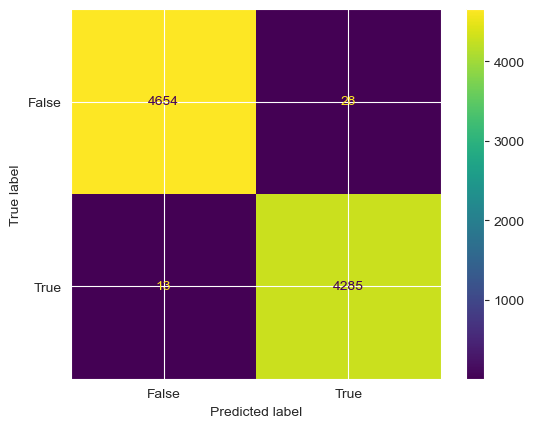

In [84]:
#Gradient Boosting Classifier
# Classifier that performed better than baseline


from sklearn.ensemble import GradientBoostingClassifier

Final_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  GradientBoostingClassifier())
])

final_model = pipe.fit(x_train, y_train)
prediction = final_model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
f1_ = f1_score(y_test, prediction, zero_division=0, pos_label='true')
precision_ = precision_score(y_test, prediction, zero_division=0, pos_label='true')
recall_ = recall_score(y_test, prediction, zero_division=0, pos_label='true')

print("accuracy:   %0.3f" % (score*100))
print("F1 Score:", f1_)
print("Precision:", precision_)
print("Recall:", recall_)

cm = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

## Prediction on unseen data

In [124]:
def predict_input(input):

    # Use the trained pipeline to predict
    model = Final_pipe.fit(x_train, y_train)
    prediction = model.predict([input])

    # Map the predicted label to a human-readable form
    label = "True" if prediction[0] else "False"

    # Print the result
    print("Prediction:", label)

In [104]:
#Import a new dataset

df_predict = pd.read_csv('/Users/gourisrinijag/Desktop/others/CM3070/FYP/News_dataset.csv')

In [135]:
df_predict.head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [133]:
input_1 = df_predict['text'][0]

In [134]:
#Run prediction function 

predict_input(input_1)

Prediction: True
